# Comparing Different Search Strategies: Maze

Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (np.int64(8), np.int64(1)).


<Figure size 640x480 with 0 Axes>

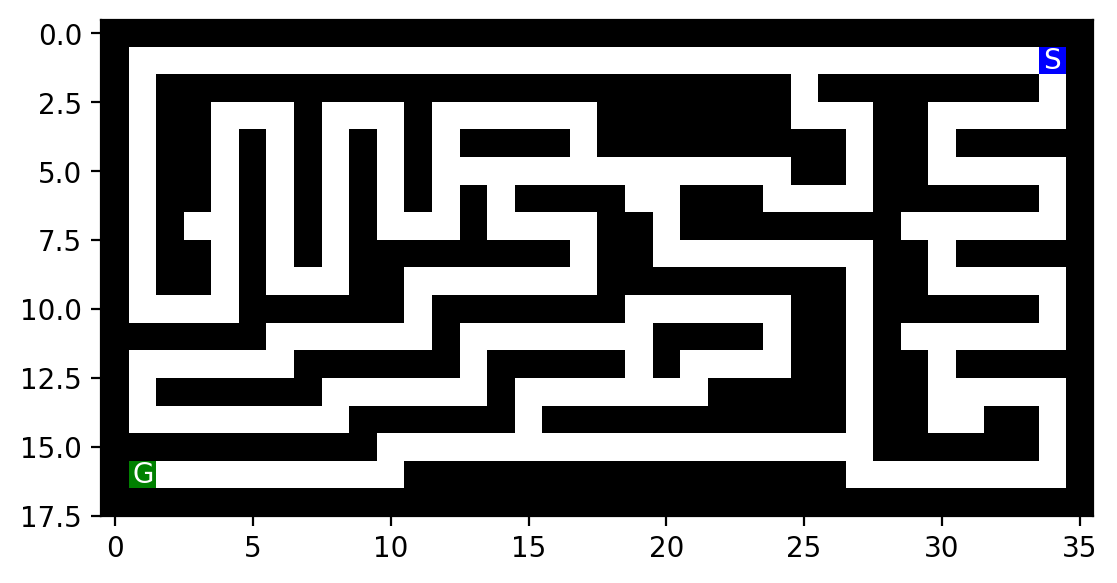

In [18]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

#f = open("small_maze.txt", "r")
f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_maze_2.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

show_maze(maze)

My implementation follows the pseudo code from the slides/textbook.

In [19]:
# tree_search_solution.py has my actual implementation (not published)
import tree_search_solution as ts


# order in which we add new states to the frontier
ts.set_order("NESW")
#ts.set_order(random=True)

Directions are checked in the order ['N', 'E', 'S', 'W']


## Experiments - Uninformed Search

### BFS

In [20]:
%time result = ts.best_first_search(maze, strategy = "BFS", animation = True)
ts.animate_maze(result)

CPU times: user 29.8 ms, sys: 4.07 ms, total: 33.9 ms
Wall time: 30.4 ms
Path length: 68
Reached squares: 269
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


### DFS 

This implementation does not use a reached data structure and has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

We need to check for all cycles. If we do not break all cycles correctly, then we can end up in an infinite loop.

In [21]:
ts.set_order("NESW")

%time result = ts.DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)
ts.animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 9.81 ms, sys: 8.08 ms, total: 17.9 ms
Wall time: 16.4 ms
Path length: 152
Reached squares: 161
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


Note on the visualization: I use gray for areas that the algorithm has explored, but DFS has already removed it from memory so they are shown white.

The exploration order (order used in the expand function) is very important for DFS! DFS uses LIFO so the directions come from the stack in reverse order.

I set the exploration order so that South will be explored before West.

In [22]:
ts.set_order("ENWS")

%time result = ts.DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)
ts.animate_maze(result)

Directions are checked in the order ['E', 'N', 'W', 'S']
CPU times: user 1.8 ms, sys: 4.07 ms, total: 5.87 ms
Wall time: 5.19 ms
Path length: 76
Reached squares: 82
Action sequence: ['S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'N', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


The best exploration order depends on the Maze, so we probably should rather use random exploration. Here the order is randomized in at each step. It will produce sometimes give good and sometimes bad solutions and can be used with multi[ple restarts.

In [23]:
ts.set_order(random=True)

%time result = ts.DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)
ts.animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 11.5 ms, sys: 3.99 ms, total: 15.5 ms
Wall time: 14.5 ms
Path length: 102
Reached squares: 112
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


## Experiments - Informed Search

### Greedy Best-First Search (GBFS)

Walks towards the goal using the heuristic. It is greedy and not guaranteed to find the optimal solution.

In [24]:
# set the heuristic to Manhattan distance
ts.heuristic = ts.manhattan

In [25]:
ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "GBFS", animation = True)
ts.animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 18 ms, sys: 3.93 ms, total: 21.9 ms
Wall time: 20.2 ms
Path length: 152
Reached squares: 162
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


### A* Search

Uses an admissible heuristic and is guaranteed to find the optimal solution. It needs to explore a little more compared to GBFS. 

In [26]:
ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "A*", animation = True)
ts.animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 24.9 ms, sys: 4.04 ms, total: 29 ms
Wall time: 27.2 ms
Path length: 68
Reached squares: 226
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']
